In [1]:
import numpy as np
import matplotlib.pyplot as plt
import softmax
import load_cifar

%matplotlib inline
%load_ext autoreload
%autoreload 2


dataset_dir = 'F:\ML\Winter-2016-CS231N-master\Assignment1\cs231n\datasets\cifar-10-batches-py'

In [2]:
Xtr, ytr, Xte, yte = load_cifar.load(dataset_dir)
print(Xtr.shape,Xte.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [3]:
num_tr = 49000
num_te = 1000
num_dv = 500

#subsample
Xvl = Xtr[num_tr:]
yvl = ytr[num_tr:]

Xtr = Xtr[:num_tr]
ytr = ytr[:num_tr]

idx = np.random.choice(num_tr,num_dv,replace = 'false')
Xdv = Xtr[idx]
ydv = ytr[idx]

Xte = Xte[:num_te]
yte = yte[:num_te]
#make rows
Xtr = Xtr.reshape(num_tr,-1)
Xte = Xte.reshape(num_te,-1)
Xdv = Xdv.reshape(num_dv,-1)
Xvl = Xvl.reshape(Xvl.shape[0],-1)

print ('Xtr shape:',Xtr.shape)
print ('Xvl shape:',Xvl.shape)
print ('Xdv.shape:',Xdv.shape)
print ('Xte shape:',Xte.shape)

mean_img = np.mean(Xtr,axis = 0)

Xtr -= mean_img
Xte -= mean_img
Xvl -= mean_img
Xdv -= mean_img

Xtr shape: (49000, 3072)
Xvl shape: (1000, 3072)
Xdv.shape: (500, 3072)
Xte shape: (1000, 3072)


In [4]:
#bias trick

Xtr = np.hstack((Xtr,np.ones((num_tr,1))))
Xte = np.hstack((Xte,np.ones((num_te,1))))
Xdv = np.hstack((Xdv,np.ones((Xdv.shape[0],1))))
Xvl = np.hstack((Xvl,np.ones((Xvl.shape[0],1))))
print ('Xtr shape:',Xtr.shape)
print ('Xvl shape:',Xvl.shape)
print ('Xdv.shape:',Xdv.shape)
print ('Xte shape:',Xte.shape)


Xtr shape: (49000, 3073)
Xvl shape: (1000, 3073)
Xdv.shape: (500, 3073)
Xte shape: (1000, 3073)


In [66]:
w = np.random.randn(3073,10) * 0.0001
d,l = softmax.compute_loss(Xdv,ydv,w,0)
#sanity check
print (np.log(0.1),'\n',l)

-2.3025850929940455 
 2.3673143729380928


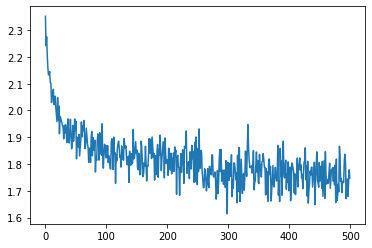

In [106]:
#predict(X, y, W, landa, b_size, lr, epoch)
w = np.random.randn(3073,10) * 0.0001
loss_history,W = softmax.train(Xtr,ytr,w,0.001,300,1e-6,500)
plt.plot(loss_history)
plt.show()

In [108]:
xtr_acc = np.mean(ytr==softmax.predict(Xtr,ytr,W))
xvl_acc = np.mean(yvl==softmax.predict(Xvl,yvl,W))
xte_acc = np.mean(yte==softmax.predict(Xte,yte,W))

print (xtr_acc,xvl_acc,xte_acc)

0.4031224489795918 0.403 0.395


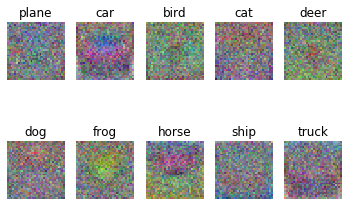

In [125]:
w_vis = W
w_vis = w_vis[:-1]
wmin , wmax = np.min(w_vis),np.max(w_vis)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2,5,i+1)
    a = (255.0*(w_vis[:,i]-wmin)/(wmax-wmin)).reshape(32,32,3)
    plt.imshow(a.astype('uint'))
    plt.axis('off')
    plt.title(classes[i])
plt.show()

In [124]:
a = np.arange(27).reshape(3,3,3)
print (np.concatenate(a).shape,np.squeeze(a).shape)

(9, 3) (3, 3, 3)
